<a href="https://colab.research.google.com/github/Lucas-Servi/redes_neuronales/blob/main/redes_neuronales_TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [456]:
import numpy as np
import matplotlib.pyplot as plt

In [457]:
class MLP:
    def __init__( self, sizes, Xdim):
        """
        Xdim is a tuple of X dimensions
        """
        self.total_error = []
        self.S = sizes
        self.L = len(self.S)
        self.Y = []
        self.W = [np.random.uniform(0, 0.2, (Xdim[1]+1, self.S[0]))] + [np.random.uniform(0, 0.2, (self.S[i-1]+1,self.S[i])) for i in range(1, self.L)]
        self.dW = [np.zeros(i.shape) for i in self.W]
        print(f"Size: {self.L}")
        print(f"Pesos: {[i.shape for i in self.W]}")

    def bias_add(self,V):
        bias = np.ones((V.shape[0],1))
        return np.hstack([V,bias])

    def bias_sub(self, V):
        return V[:,:-1]

    def activacion(self, X, act_func = np.tanh):
        Y = []
        Y0 = X
        for k in range(self.L):
            Y.append(self.bias_add(Y0))
            Y0 = act_func(np.dot(Y[k], self.W[k]))
        Y.append(Y0)
        return Y

    def correction(self, Y, Z):
        E = Z - Y[-1]
        dY = 1 - np.square(Y[-1]) # ESTA ES LA DERIVADA DE Tanh, si uso por ejemplo sigmoidea serìa Y-(1-Y)
        D = E * dY
        for k in reversed(range(self.L-1)):
            self.dW[k+1] = np.dot(Y[k+1].T, D)
            E = np.dot(D, self.W[k+1].T)
            dY = 1 - np.square(Y[k+1])
            D = self.bias_sub(E * dY)           #CONSULTAR ESTE BIAS SOLO AL dY, antes era D = self.bias_sub(E * dY)
        self.dW[0] = np.dot(Y[0].T, D)
        return self.dW

    def adaptacion(self, dW, lr):
        for k in range(self.L-1):
            self.W[k] = self.W[k] + (lr * dW[k])

    def estimation(self, Z, Y):
        self.total_error.append(np.mean(np.square(Z - Y[-1])))
        return self.total_error[-1]

In [451]:
#Generacion de datos
P = 1000
Si = 6
So = 1

X = np.random.uniform(-5,5, (P,Si))
Z = np.sign(np.prod(X,axis=1).reshape((P,So)))
X = np.random.uniform(-5,5, (P,Si))
Z = np.sign(np.prod(X,axis=1).reshape((P,So)))

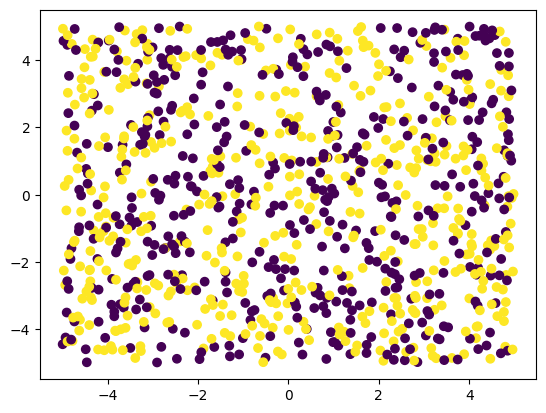

In [452]:
plt.scatter(X[:,0],X[:,1],c=Z.flatten())
plt.show()

In [458]:
red = MLP([8,5,1], X.shape)
E=1

Size: 3
Pesos: [(7, 8), (9, 5), (6, 1)]


In [454]:
epoch=0
tot_E = []
E=10
lr = 0.001 #learning rate
error = 0.1

while E > 0.01:
    #print(f"epoch {epoch}")
    Y = red.activacion(X)
    #print([i.shape for i in Y])
    dW = red.correction(Y,Z)
    #print(f"W: {[i.shape for i in red.W]}")
    #print(f"dW: {[i.shape for i in dW]}")
    red.adaptacion(dW, lr)
    E = red.estimation(Z,Y)

    if epoch % 500 == 0:
        print(f"Epoch: {epoch}, Error -> {E}")
    epoch+=1
    tot_E.append(E)


    if epoch > 10000:
        break

Epoch: 0, Error -> 1.0758215846487418
Epoch: 500, Error -> 0.9295494074436854
Epoch: 1000, Error -> 0.8819669641206165
Epoch: 1500, Error -> 0.8648425977614786
Epoch: 2000, Error -> 0.854449560602437
Epoch: 2500, Error -> 0.8472111516147987
Epoch: 3000, Error -> 0.8414889857021584
Epoch: 3500, Error -> 0.8373474594759199
Epoch: 4000, Error -> 0.833774457306947
Epoch: 4500, Error -> 0.8308014115943185
Epoch: 5000, Error -> 0.82820341168297
Epoch: 5500, Error -> 0.8260056467072773
Epoch: 6000, Error -> 0.8241094468838478
Epoch: 6500, Error -> 0.8224374713120175
Epoch: 7000, Error -> 0.8209451742887972
Epoch: 7500, Error -> 0.8196072351006005
Epoch: 8000, Error -> 0.8184031376859368
Epoch: 8500, Error -> 0.8173146548406051
Epoch: 9000, Error -> 0.8163259315465137
Epoch: 9500, Error -> 0.8154234899529159
Epoch: 10000, Error -> 0.8145960027640905


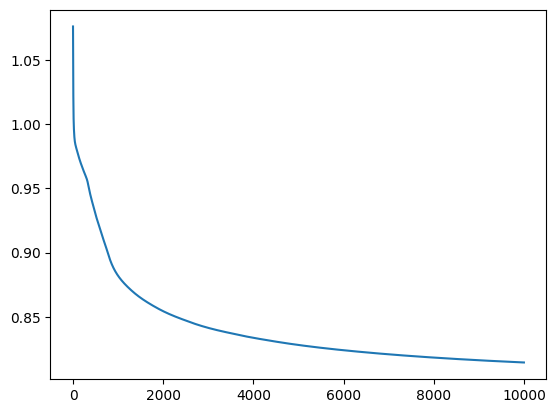

In [455]:
plt.plot(tot_E)